In [ ]:
pip install matplotlib==3.1.0

In [ ]:
!pip install lightgbm

In [ ]:
conda install -c conda-forge lightgbm

In [ ]:
pip install optuna

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import xgboost as xgb
import warnings
import optuna
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_log_error
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

from xgboost import XGBRegressor
from xgboost import plot_importance
from lightgbm import LGBMRegressor
from pandas_profiling import ProfileReport
from datetime import datetime

## Kaggle

In [ ]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
df = pd.read_csv('../input/playground-series-s4e12/train.csv')

## Destkop

In [3]:
df = pd.read_csv("/Users/omerfaruk/Desktop/DS Projects/Regression with an Insurance Data Set/playground-series-s4e12/train.csv")
test = pd.read_csv("/Users/omerfaruk/Desktop/DS Projects/Regression with an Insurance Data Set/playground-series-s4e12/test.csv")



In [4]:
df.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,...,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,...,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,...,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0


In [5]:
test.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
0,1200000,28.0,Female,2310.0,NaN,4.0,Bachelor's,Self-Employed,7.657981,Rural,Basic,NaN,19.0,NaN,1.0,2023-06-04 15:21:39.245086,Poor,Yes,Weekly,House
1,1200001,31.0,Female,126031.0,Married,2.0,Master's,Self-Employed,13.381379,Suburban,Premium,NaN,14.0,372.0,8.0,2024-04-22 15:21:39.224915,Good,Yes,Rarely,Apartment
2,1200002,47.0,Female,17092.0,Divorced,0.0,PhD,Unemployed,24.354527,Urban,Comprehensive,NaN,16.0,819.0,9.0,2023-04-05 15:21:39.134960,Average,Yes,Monthly,Condo
3,1200003,28.0,Female,30424.0,Divorced,3.0,PhD,Self-Employed,5.136225,Suburban,Comprehensive,1.0,3.0,770.0,5.0,2023-10-25 15:21:39.134960,Poor,Yes,Daily,House
4,1200004,24.0,Male,10863.0,Divorced,2.0,High School,Unemployed,11.844155,Suburban,Premium,NaN,14.0,755.0,7.0,2021-11-26 15:21:39.259788,Average,No,Weekly,House


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1200000 non-null  int64  
 1   Age                   1181295 non-null  float64
 2   Gender                1200000 non-null  object 
 3   Annual Income         1155051 non-null  float64
 4   Marital Status        1181471 non-null  object 
 5   Number of Dependents  1090328 non-null  float64
 6   Education Level       1200000 non-null  object 
 7   Occupation            841925 non-null   object 
 8   Health Score          1125924 non-null  float64
 9   Location              1200000 non-null  object 
 10  Policy Type           1200000 non-null  object 
 11  Previous Claims       835971 non-null   float64
 12  Vehicle Age           1199994 non-null  float64
 13  Credit Score          1062118 non-null  float64
 14  Insurance Duration    1199999 non-

In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    800000 non-null  int64  
 1   Age                   787511 non-null  float64
 2   Gender                800000 non-null  object 
 3   Annual Income         770140 non-null  float64
 4   Marital Status        787664 non-null  object 
 5   Number of Dependents  726870 non-null  float64
 6   Education Level       800000 non-null  object 
 7   Occupation            560875 non-null  object 
 8   Health Score          750551 non-null  float64
 9   Location              800000 non-null  object 
 10  Policy Type           800000 non-null  object 
 11  Previous Claims       557198 non-null  float64
 12  Vehicle Age           799997 non-null  float64
 13  Credit Score          708549 non-null  float64
 14  Insurance Duration    799998 non-null  float64
 15  

## Data Profile

In [ ]:
profile = ProfileReport(df, title="Insurance Dataset Report")
profile.to_notebook_iframe()

numerical_features = ['Age', 'Annual Income', 'Number of Dependents', 'Health Score', 
                      'Previous Claims', 'Vehicle Age', 'Credit Score', 'Insurance Duration']
plt.figure(figsize=(8,6))
sns.heatmap(df[numerical_features].corr(),annot=True,cmap="Blues");
plt.show()

correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="Blues", cbar=True, linewidths=0.5)
plt.title("Correlation Heatmap of Numerical Variables", fontsize=16)
plt.show()

sns.set_style("whitegrid")
plt.figure(figsize=(13,11)) 
for i in range(1,7):
    f=plt.subplot(2,5,i)
    sns.boxplot(x = 'Gender', y = numerical_features[i-1], data = df)
plt.show()

## Pre-processing and feature extraction

In [8]:
# Handling Missing Values
print("\nHandling Missing Values:")

# Define columns for numerical and categorical features
numerical_features = ['Age', 'Annual Income', 'Number of Dependents', 'Health Score', 
                      'Previous Claims', 'Vehicle Age', 'Credit Score', 'Insurance Duration']
categorical_features = ['Gender', 'Marital Status', 'Education Level', 'Occupation', 
                        'Location', 'Policy Type', 'Customer Feedback', 'Smoking Status', 
                        'Exercise Frequency', 'Property Type']

# Impute missing numerical data with mean
num_imputer = SimpleImputer(strategy='mean')
df[numerical_features] = num_imputer.fit_transform(df[numerical_features])

# Impute missing categorical data with 'Unknown'
cat_imputer = SimpleImputer(strategy='constant', fill_value='Unknown')
df[categorical_features] = cat_imputer.fit_transform(df[categorical_features])

print("Missing values handled.")

# Feature Engineering
print("\nFeature Engineering:")

# Convert 'Policy Start Date' into a numerical feature (e.g., policy age)
if 'Policy Start Date' in df.columns:
    df['Policy Start Date'] = pd.to_datetime(df['Policy Start Date'])
    current_date = datetime.now()
    df['Policy Age'] = (current_date - df['Policy Start Date']).dt.days

# Drop original 'Policy Start Date' as it's no longer needed
if 'Policy Start Date' in df.columns:
    df.drop(columns=['Policy Start Date'], inplace=True)

print("Feature engineering completed.")

# Encoding Categorical Variables
print("\nEncoding Categorical Variables:")

# One-Hot Encode categorical features
df_encoded = pd.get_dummies(df, columns=categorical_features, drop_first=True)

print("Categorical variables encoded.")

# Scaling Numerical Features
print("\nScaling Numerical Features:")

# Standardize numerical features
scaler = StandardScaler()
df_encoded[numerical_features] = scaler.fit_transform(df_encoded[numerical_features])

print("Numerical features scaled.")

# Check processed data
print("\nProcessed Data Preview:")
display(df_encoded.head())

# Save preprocessed data for later use
df_encoded.to_csv('preprocessed_data.csv', index=False)
print("Preprocessed data saved as 'preprocessed_data.csv'.")



Handling Missing Values:
Missing values handled.

Feature Engineering:
Feature engineering completed.

Encoding Categorical Variables:
Categorical variables encoded.

Scaling Numerical Features:
Numerical features scaled.

Processed Data Preview:


,id,Age,Annual Income,Number of Dependents,Health Score,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Premium Amount,...,Policy Type_Premium,Customer Feedback_Good,Customer Feedback_Poor,Customer Feedback_Unknown,Smoking Status_Yes,Exercise Frequency_Monthly,Exercise Frequency_Rarely,Exercise Frequency_Weekly,Property Type_Condo,Property Type_House
0,0,-1.648471,-0.718893,-0.747535,-0.255071,1.215746,1.286338,-1.565702e+00,-0.007023,2869.0,...,1,0,1,0,0,0,0,1,0,1
1,1,-0.159711,-0.033804,0.732830,-0.849704,-0.003278,0.420713,7.163281e-01,-1.163391,1483.0,...,0,0,0,0,1,1,0,0,0,1
2,2,-1.350719,-0.226258,0.732830,1.824212,-0.003278,0.766963,-1.611408e-15,-0.777935,567.0,...,1,1,0,0,1,0,0,1,0,1
3,3,-1.499595,3.456006,-0.007353,-1.241521,-0.003278,-1.656787,-1.601137e+00,-1.548847,765.0,...,0,0,1,0,1,0,0,0,0,0
4,4,-1.499595,0.218738,-0.747535,-0.443102,-1.222302,-0.271787,3.597138e-02,-0.392479,2022.0,...,1,0,1,0,1,0,0,1,0,1


Preprocessed data saved as 'preprocessed_data.csv'.


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1200000 non-null  int64  
 1   Age                   1200000 non-null  float64
 2   Gender                1200000 non-null  object 
 3   Annual Income         1200000 non-null  float64
 4   Marital Status        1200000 non-null  object 
 5   Number of Dependents  1200000 non-null  float64
 6   Education Level       1200000 non-null  object 
 7   Occupation            1200000 non-null  object 
 8   Health Score          1200000 non-null  float64
 9   Location              1200000 non-null  object 
 10  Policy Type           1200000 non-null  object 
 11  Previous Claims       1200000 non-null  float64
 12  Vehicle Age           1200000 non-null  float64
 13  Credit Score          1200000 non-null  float64
 14  Insurance Duration    1200000 non-

In [10]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 34 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   id                           1200000 non-null  int64  
 1   Age                          1200000 non-null  float64
 2   Annual Income                1200000 non-null  float64
 3   Number of Dependents         1200000 non-null  float64
 4   Health Score                 1200000 non-null  float64
 5   Previous Claims              1200000 non-null  float64
 6   Vehicle Age                  1200000 non-null  float64
 7   Credit Score                 1200000 non-null  float64
 8   Insurance Duration           1200000 non-null  float64
 9   Premium Amount               1200000 non-null  float64
 10  Policy Age                   1200000 non-null  int64  
 11  Gender_Male                  1200000 non-null  uint8  
 12  Marital Status_Married       1200000 non-n

## Quick Test: Model Selection with RMSLE

In [12]:
# Define RMSLE function
def calculate_rmsle(y_true, y_pred):
    # Ensure non-negative predictions
    y_pred = np.clip(y_pred, a_min=0, a_max=None)
    return np.sqrt(mean_squared_log_error(y_true, y_pred))

# Define the target variable and features
TARGET = 'Premium Amount'  # Replace with your actual target column name
if TARGET not in df_encoded.columns:
    raise ValueError(f"The target variable '{TARGET}' is missing in the dataset.")

X = df_encoded.drop(columns=[TARGET])
y = df_encoded[TARGET]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print("\nData split into training and testing sets.")

# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(),
    'Lasso Regression': Lasso(),
    'ElasticNet Regression': ElasticNet(),
    'Decision Tree': DecisionTreeRegressor(random_state=99),
    'Random Forest': RandomForestRegressor(random_state=99),
    'Gradient Boosting': GradientBoostingRegressor(random_state=99),
    'AdaBoost': AdaBoostRegressor(random_state=99),
    'XGBoost': XGBRegressor(random_state=99),
    'LightGBM': LGBMRegressor(random_state=99),
}

# Train and evaluate models
print("\nTraining and Evaluating Models:")
results = {}

for model_name, model in models.items():
    print(f"\nTraining {model_name}...")
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Evaluate performance using RMSLE
    rmsle = calculate_rmsle(y_test, y_pred)
    results[model_name] = {'RMSLE': rmsle}
    
    print(f"{model_name} RMSLE: {rmsle:.4f}")

# Display all results
print("\nSummary of Model Performance:")
for model, metrics in results.items():
    print(f"{model}: RMSLE = {metrics['RMSLE']:.4f}")

# Identify the best model
best_model_name = min(results, key=lambda x: results[x]['RMSLE'])
print(f"\nBest Model: {best_model_name} with RMSLE = {results[best_model_name]['RMSLE']:.4f}")




Data split into training and testing sets.

Training and Evaluating Models:

Training Linear Regression...
Linear Regression RMSLE: 1.1677

Training Ridge Regression...
Ridge Regression RMSLE: 1.1677

Training Lasso Regression...
Lasso Regression RMSLE: 1.1681

Training ElasticNet Regression...
ElasticNet Regression RMSLE: 1.1694

Training Decision Tree...
Decision Tree RMSLE: 1.5070

Training Random Forest...
Random Forest RMSLE: 1.1490

Training Gradient Boosting...
Gradient Boosting RMSLE: 1.1577

Training AdaBoost...
AdaBoost RMSLE: 1.2802

Training XGBoost...
XGBoost RMSLE: 1.1380

Training LightGBM...
LightGBM RMSLE: 1.1339

Summary of Model Performance:
Linear Regression: RMSLE = 1.1677
Ridge Regression: RMSLE = 1.1677
Lasso Regression: RMSLE = 1.1681
ElasticNet Regression: RMSLE = 1.1694
Decision Tree: RMSLE = 1.5070
Random Forest: RMSLE = 1.1490
Gradient Boosting: RMSLE = 1.1577
AdaBoost: RMSLE = 1.2802
XGBoost: RMSLE = 1.1380
LightGBM: RMSLE = 1.1339

Best Model: LightGBM wi

## Hyperparameter tuning for LGBM

In [ ]:
if best_model_name == 'LightGBM':
    print("\nHyperparameter Tuning for LightGBM:")
    param_grid = {
        'num_leaves': [31, 50, 100],
        'max_depth': [-1, 10, 20],
        'learning_rate': [0.01, 0.05, 0.1],
        'n_estimators': [100, 200, 500],
    }
    grid_search = GridSearchCV(estimator=LGBMRegressor(random_state=99),
                               param_grid=param_grid, 
                               scoring='neg_mean_squared_log_error', 
                               cv=3, verbose=1, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Best parameters and performance
    print("\nBest Parameters for LightGBM:")
    print(grid_search.best_params_)
    best_lgbm = grid_search.best_estimator_
    y_pred_lgbm = best_lgbm.predict(X_test)

    # Final evaluation of the best LightGBM model
    final_rmsle = calculate_rmsle(y_test, y_pred_lgbm)
    print(f"Final RMSLE for Optimized LightGBM: {final_rmsle:.4f}")

#### Outputs

Hyperparameter Tuning for LightGBM:
Fitting 3 folds for each of 81 candidates, totalling 243 fits

Best Parameters for LightGBM:
{'learning_rate': 0.05, 'max_depth': 20, 'n_estimators': 500, 'num_leaves': 100}
Final RMSLE for Optimized LightGBM: 1.1329

In [ ]:
# Hyperparameter tuning with more parameters
if best_model_name == 'LightGBM':
    print("\nAdvanced Hyperparameter Tuning for LightGBM:")
    param_grid = {
        'num_leaves': [300, 350, 400],
        'max_depth': [15, 20],
        'learning_rate': [0.02, 0.03],
        'n_estimators': [500, 550],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0]
        
    }
    grid_search = GridSearchCV(estimator=LGBMRegressor(random_state=99),
                               param_grid=param_grid, 
                               scoring='neg_mean_squared_log_error', 
                               cv=3, verbose=1, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Best parameters and performance
    print("\nBest Parameters for LightGBM:")
    print(grid_search.best_params_)
    best_lgbm = grid_search.best_estimator_
    y_pred_lgbm = best_lgbm.predict(X_test)

    # Final evaluation of the best LightGBM model
    final_rmsle = calculate_rmsle(y_test, y_pred_lgbm)
    print(f"Final RMSLE for Optimized LightGBM: {final_rmsle:.4f}")

#### Outputs

Advanced Hyperparameter Tuning for LightGBM:
Fitting 3 folds for each of 216 candidates, totalling 648 fits

Best Parameters for LightGBM:
{'colsample_bytree': 1.0, 'learning_rate': 0.03, 'max_depth': 15, 'n_estimators': 500, 'num_leaves': 350, 'subsample': 0.6}
Final RMSLE for Optimized LightGBM: 1.1330

## Plotting Feature Importances


Plotting Feature Importances for LightGBM:


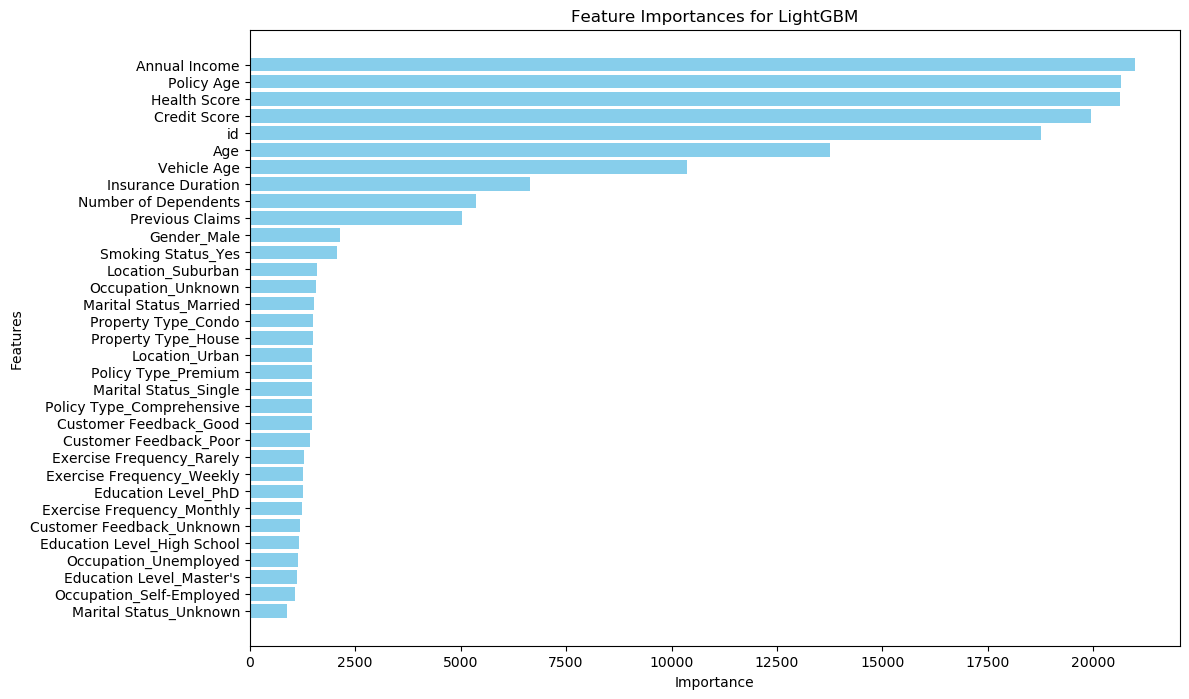

In [34]:
print("\nPlotting Feature Importances for LightGBM:")
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': best_lgbm.feature_importances_
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(12, 8))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.title('Feature Importances for LightGBM')
plt.gca().invert_yaxis()
plt.show()

## Steps to Process the Test Data and Predict

In [37]:
# Step 1: Feature Engineering for the Test DataFrame
def preprocess_test_data(df):
    # Handle missing values (same strategy as training data)
    df['Age'].fillna(df['Age'].median(), inplace=True)
    df['Annual Income'].fillna(df['Annual Income'].median(), inplace=True)
    df['Marital Status'].fillna('Unknown', inplace=True)
    df['Number of Dependents'].fillna(df['Number of Dependents'].median(), inplace=True)
    df['Occupation'].fillna('Unknown', inplace=True)
    df['Health Score'].fillna(df['Health Score'].median(), inplace=True)
    df['Previous Claims'].fillna(0, inplace=True)
    df['Vehicle Age'].fillna(df['Vehicle Age'].median(), inplace=True)
    df['Credit Score'].fillna(df['Credit Score'].median(), inplace=True)
    df['Insurance Duration'].fillna(df['Insurance Duration'].median(), inplace=True)
    df['Customer Feedback'].fillna('No Feedback', inplace=True)
    
    # Convert 'Policy Start Date' into a numerical feature (same as training data)
    if 'Policy Start Date' in df.columns:
        df['Policy Start Date'] = pd.to_datetime(df['Policy Start Date'])
        current_date = datetime.now()
        df['Policy Age'] = (current_date - df['Policy Start Date']).dt.days
        df.drop(columns=['Policy Start Date'], inplace=True)
    
    # One-hot encode categorical variables
    categorical_columns = [
        'Gender', 'Marital Status', 'Education Level', 'Occupation', 'Location',
        'Policy Type', 'Customer Feedback', 'Smoking Status', 'Exercise Frequency', 'Property Type'
    ]
    df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
    
    return df

# Preprocess the test dataset
test_preprocessed = preprocess_test_data(test)

# Ensure alignment of columns between training and test datasets
missing_cols = set(X_train.columns) - set(test_preprocessed.columns)
for col in missing_cols:
    test_preprocessed[col] = 0
test_preprocessed = test_preprocessed[X_train.columns]

# Step 2: Generate Predictions using the Best LightGBM Model
test_predictions = best_lgbm.predict(test_preprocessed)

# Clip predictions to ensure they are non-negative
test_predictions = np.clip(test_predictions, a_min=0, a_max=None)

# Step 3: Save Predictions

submission = pd.DataFrame({'id': test['id'], 'Premium Amount': test_predictions})
submission.to_csv("submission.csv", index=False)

print("Predictions saved to 'submission.csv'.")


Predictions saved to 'submission.csv'.


### If you want to play around.. 

## Advanced hyperparameter tuning for LightGBM using Optuna

In [ ]:
if best_model_name == 'LightGBM':
    print("\nAdvanced Hyperparameter Tuning for LightGBM using Optuna:")

    def objective(trial):
        param_grid = {
            'num_leaves': trial.suggest_int('num_leaves', 20, 200),
            'max_depth': trial.suggest_int('max_depth', -1, 30),
            'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3, log=True),
            'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
            'subsample': trial.suggest_float('subsample', 0.6, 1.0),
            'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
            'min_child_weight': trial.suggest_int('min_child_weight', 1, 10),
            'reg_alpha': trial.suggest_float('reg_alpha', 0.0, 1.0),
            'reg_lambda': trial.suggest_float('reg_lambda', 0.0, 1.0),
        }

        model = LGBMRegressor(random_state=42, **param_grid)
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        return calculate_rmsle(y_test, y_pred)

    study = optuna.create_study(direction='minimize')
    study.optimize(objective, n_trials=50, n_jobs=-1)

    print("\nBest Parameters for LightGBM:")
    print(study.best_params)

    # Train final model with best parameters
    best_params = study.best_params
    best_lgbm = LGBMRegressor(random_state=42, **best_params)
    best_lgbm.fit(X_train, y_train)
    y_pred_lgbm = best_lgbm.predict(X_test)

    # Final evaluation of the best LightGBM model
    final_rmsle = calculate_rmsle(y_test, y_pred_lgbm)
    print(f"Final RMSLE for Optimized LightGBM: {final_rmsle:.4f}")

## Hyperparameter tuning for XGB

In [ ]:
if best_model_name == 'XGBoost':
    print("\nHyperparameter Tuning for XGBoost:")
    param_grid = {
        'max_depth': [3, 5, 10],
        'learning_rate': [0.01, 0.1, 0.2],
        'n_estimators': [100, 200, 500],
        'colsample_bytree': [0.3, 0.7, 1.0]
    }
    grid_search = GridSearchCV(estimator=XGBRegressor(random_state=42),
                               param_grid=param_grid, 
                               scoring='neg_mean_squared_log_error', 
                               cv=3, verbose=1, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Best parameters and performance
    print("\nBest Parameters for XGBoost:")
    print(grid_search.best_params_)
    best_xgb = grid_search.best_estimator_
    y_pred_xgb = best_xgb.predict(X_test)

    # Final evaluation of the best XGBoost model
    final_rmsle = calculate_rmsle(y_test, y_pred_xgb)
    print(f"Final RMSLE for Optimized XGBoost: {final_rmsle:.4f}")

## Hyperparameter tuning for RF

In [ ]:
if best_model_name == 'Random Forest':
    print("\nHyperparameter Tuning for Random Forest:")
    param_grid = {
        'n_estimators': [50, 100, 200],
        'max_depth': [10, 20, None],
        'min_samples_split': [2, 5, 10],
    }
    grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42),
                               param_grid=param_grid, 
                               scoring='neg_mean_squared_log_error', 
                               cv=3, verbose=1, n_jobs=-1)
    grid_search.fit(X_train, y_train)

    # Best parameters and performance
    print("\nBest Parameters for Random Forest:")
    print(grid_search.best_params_)
    best_rf = grid_search.best_estimator_
    y_pred_rf = best_rf.predict(X_test)

    # Final evaluation of the best Random Forest model
    final_rmsle = calculate_rmsle(y_test, y_pred_rf)
    print(f"Final RMSLE for Optimized Random Forest: {final_rmsle:.4f}")

## To be continued..